Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NOAA Weather Data:
       month  HDD
0 2023-01-01  689
1 2023-02-01  589
2 2023-03-01  589
3 2023-04-01  219
4 2023-05-01  132
                     month         HDD
count                   24   24.000000
mean   2023-12-16 10:00:00  316.458333
min    2023-01-01 00:00:00    0.000000
25%    2023-06-23 12:00:00   15.250000
50%    2023-12-16 12:00:00  220.500000
75%    2024-06-08 12:00:00  589.000000
max    2024-12-01 00:00:00  863.000000
std                    NaN  305.459451

EIA Energy Demand Data:
       month  gas_demand  Unnamed: 2  Unnamed: 3  Unnamed: 4
0 2001-01-01        5440         NaN         NaN         NaN
1 2001-02-01        4546         NaN         NaN         NaN
2 2001-03-01        4141         NaN         NaN         NaN
3 2001-04-01        3185         NaN         NaN         NaN
4 2001-05-01        1654         NaN         NaN         NaN
  

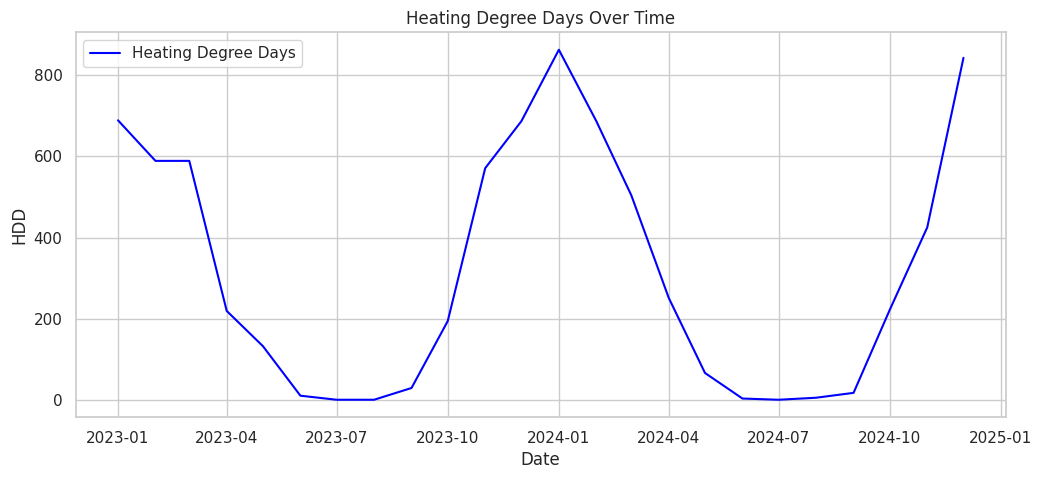

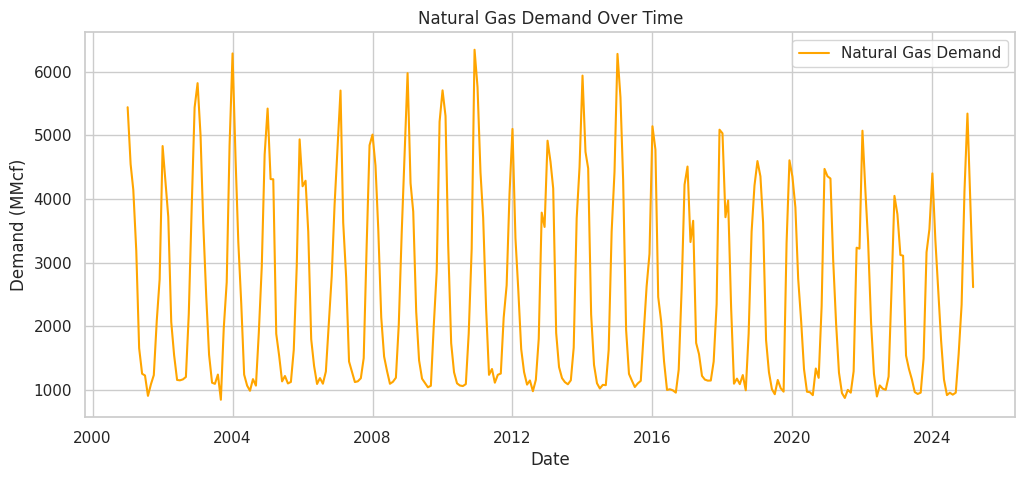


Merged Data Sample:
       month  HDD  gas_demand  Unnamed: 2  Unnamed: 3  Unnamed: 4
0 2023-01-01  689        3758         NaN         NaN         NaN
1 2023-02-01  589        3119         NaN         NaN         NaN
2 2023-03-01  589        3107         NaN         NaN         NaN
3 2023-04-01  219        1538         NaN         NaN         NaN
4 2023-05-01  132        1329         NaN         NaN         NaN


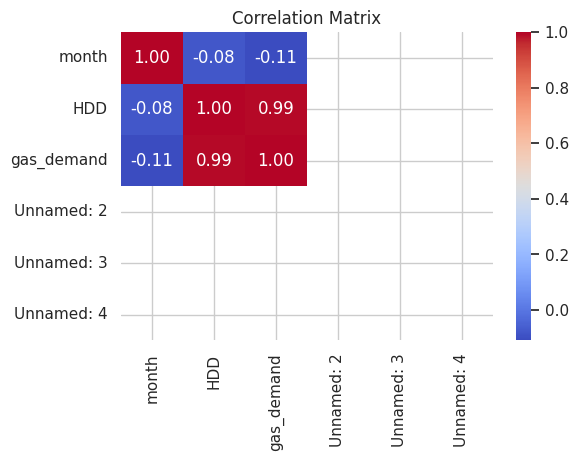

In [27]:
# 📦 Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os
from google.colab import drive
drive.mount('/content/drive')

# Add the src directory to Python path
sys.path.append(os.path.abspath('/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/src'))

from data_processing import process_noaa, process_eia
from preprocess import create_features

# Optional: Set up visual style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 5)


# File paths
noaa_path = "/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/raw/NOAA_Data.csv"
eia_path = "/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/raw/EIA_Gas_Data.csv"
output_path = "/content/drive/MyDrive/Weather Data Projects/Weather_NatGas/data/processed/modeling_dataset.csv"

# Run processing functions
df_weather = process_noaa(noaa_path)
df_energy = process_eia(eia_path)

# 🧼 Quick inspection
print("NOAA Weather Data:")
print(df_weather.head())
print(df_weather.describe())


print("\nEIA Energy Demand Data:")
print(df_energy.head())
print(df_energy.describe())

# 🗓️ Check date alignment
print(f"Weather date range: {df_weather['month'].min()} to {df_weather['month'].max()}")
print(f"Energy date range: {df_energy['month'].min()} to {df_energy['month'].max()}")

# 📈 Plot time series
plt.plot(df_weather["month"], df_weather["HDD"], label="Heating Degree Days", color="blue")
plt.title("Heating Degree Days Over Time")
plt.xlabel("Date")
plt.ylabel("HDD")
plt.legend()
plt.show()

plt.plot(df_energy["month"], df_energy["gas_demand"], label="Natural Gas Demand", color="orange")
plt.title("Natural Gas Demand Over Time")
plt.xlabel("Date")
plt.ylabel("Demand (MMcf)")
plt.legend()
plt.show()

# 🔗 Merge datasets
df_merged = pd.merge(df_weather, df_energy, on="month", how="inner")

# 🧠 Correlation check
print("\nMerged Data Sample:")
print(df_merged.head())

plt.figure(figsize=(6, 4))
sns.heatmap(df_merged.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

